# Introduction

<B>Objective of this notebook is to predict the salary based on years of experience.</B>

<B><I>Goal: To predict the salary for given years of experience based on the dataset provided</B></I>

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable. - Wikipedia

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data.

In this notebook, we will follow below steps to come up with predictor function for salary based on the provided data set.
-	Descriptive Analytics (Study of given data)
-	Data Visualization
-	Diagnostic Analytics (Study of relationships among given dataset)
-	Prediction
-	Validation


<I>References:
- wikipedia (https://www.wikipedia.org/)
- Analytics Vidhya (https://www.analyticsvidhya.com/)
- Real Python (https://realpython.com/)
- GeeksforGeeks (https://www.geeksforgeeks.org/python-programming-language/)
</I>


In [270]:
# importing required libraries

import pandas as pd # for data frames
import numpy as np # for array reshaping
import seaborn as sn # for plots
import matplotlib.pyplot as plt # for plots
from sklearn.model_selection import train_test_split # to do test & train data split
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn import metrics # for the error metrics
from sklearn.metrics import r2_score # for calculation the r squared value
import statsmodels.api as sm # Linear regression with statsmodels

In [271]:
# Creating data frame and ingesting the data from .csv file into the data frame
df = pd.read_csv('C:/Users/rm634391/Analytics/Kaggle/Salary/Salary_Data.csv')

## Descriptive Analytics (Study of given data)

In [272]:
# Printing the number of rows & number of columns in data frame
df.shape

(30, 2)

In [273]:
# Printing data types of each column
datatypes = df.dtypes
datatypes

YearsExperience    float64
Salary             float64
dtype: object

In [274]:
# Counting total null values in the data frame
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [275]:
# Counting null values in the data frame by rows
for i in range(len(df.index)) :
    print(" Total NaN in row", i + 1, ":",
          df.iloc[i].isnull().sum())

 Total NaN in row 1 : 0
 Total NaN in row 2 : 0
 Total NaN in row 3 : 0
 Total NaN in row 4 : 0
 Total NaN in row 5 : 0
 Total NaN in row 6 : 0
 Total NaN in row 7 : 0
 Total NaN in row 8 : 0
 Total NaN in row 9 : 0
 Total NaN in row 10 : 0
 Total NaN in row 11 : 0
 Total NaN in row 12 : 0
 Total NaN in row 13 : 0
 Total NaN in row 14 : 0
 Total NaN in row 15 : 0
 Total NaN in row 16 : 0
 Total NaN in row 17 : 0
 Total NaN in row 18 : 0
 Total NaN in row 19 : 0
 Total NaN in row 20 : 0
 Total NaN in row 21 : 0
 Total NaN in row 22 : 0
 Total NaN in row 23 : 0
 Total NaN in row 24 : 0
 Total NaN in row 25 : 0
 Total NaN in row 26 : 0
 Total NaN in row 27 : 0
 Total NaN in row 28 : 0
 Total NaN in row 29 : 0
 Total NaN in row 30 : 0


In [276]:
# Statistics of the data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


## Data Visualization

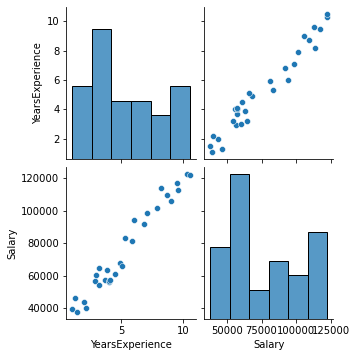

In [277]:
# We can plot Pair plot to understand the best set of features to explain a relationship between two variables
# Since our dataset has only two attributes, when we plot it shows the relationship between salary & years of experience
sn.pairplot(df)


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

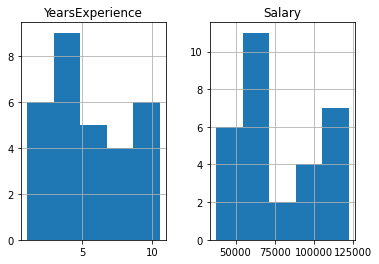

In [278]:
# Though the above pair plot depicted the histogram, below code is for learning
# Let us understand the distribution of both years of experience and salary

hist = df.hist(bins=5)
hist

## Correlation (Diagnostic Analytics)

<AxesSubplot:>

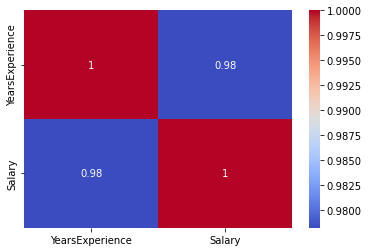

In [279]:
# Checking for correlation between salary & years of experience

# Creating a correlation matrix from the data frame
corrMatrix = df.corr()

# Plotting using heatmap
sn.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

Let us try the correlation with Kendall method and scatter plot

In [280]:
# Correlation using kendall method
df.corr(method ='kendall')

,YearsExperience,Salary
YearsExperience,1.000000,0.841016
Salary,0.841016,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

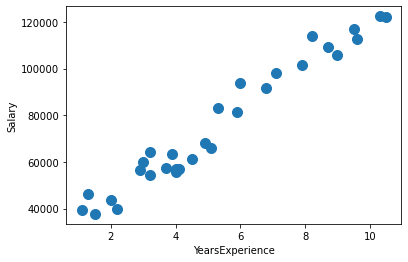

In [281]:
# scatter plot of Age & Spending Score
df.plot.scatter(x = 'YearsExperience', y = 'Salary', s = 100)

The above correlation depicts there is a strong positive correlation between years of experience & salary. In the next step we will be building linear regression model

## Building the model

##### Splitting the dataset

First step is to split the given dataset into training dataset and test dataset. While training dataset will be used to build the model, test dataset will be leveraged to validate the model. Since the est dataset has the actual output, we can validate with predicted outcome and understand error metrics such as accuracy, precision and so on.

In [284]:
# Before splitting we will be building two arrays x & y
# x array contains the data that we use to make predictions (years of experience)
# y array contains the data that we will be predicting (Salary)
# In nutshell, y is dependent onx

x = df['YearsExperience']
y = df['Salary']


0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [285]:
# Now let us split the datasets x & y into train & test respectively. 
# 0.2 represents 10% of data will be leveraged for training & 30% of data will be used for test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [292]:
# Since we have single feature we need to convert into a 2-D array with reshape (since model training requires 2-D array)
# This step is NOT required if you have more than one features for prediction

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
x_train

array([[ 2. ],
       [ 9.5],
       [ 9.6],
       [ 2.9],
       [ 1.5],
       [ 5.3],
       [ 4.9],
       [ 3. ],
       [10.5],
       [ 8.7],
       [ 6. ],
       [ 8.2],
       [ 4.5],
       [ 6.8],
       [ 1.3],
       [ 3.7],
       [ 2.2],
       [ 4. ],
       [ 7.1],
       [ 1.1],
       [ 4. ],
       [ 5.1],
       [ 4.1],
       [ 3.9]])

##### Building the model

We will be building linear regression

In [293]:
# Linear Regression Model
model = LinearRegression()

# Training the model with the training data x (years of experience) & y (salary)
response= model.fit(x_train, y_train)

# Getting the coefficient
coeff = response.coef_

# Getting the intercept
intercept = response.intercept_

print ("The coefficient is: %d and the intercept is: %d"  %(coeff, intercept))


The coefficient is: 9647 and the intercept is: 24742


## Prediction

In this step, we will be passing the test set to validate the model and predict

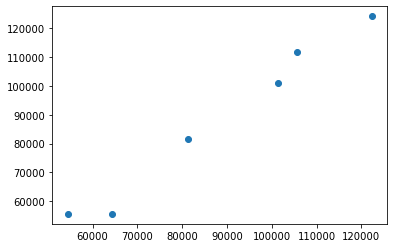

In [294]:
# predicing the responses (y, the salary) based on the predictor (x, the years of experience)

predictions = model.predict(x_test)

# We will be comparing with the predicted value with actual response (which was stored in y_test)

plt.scatter(y_test, predictions)

The above plot depicts a close prediction to the actual value (based on the straight diagnoal line). 

## Validation of the model

In this step, we will be validating the performance of the built model. There are several performance metrics and we will be starting with r squared value:

R-squared (R2) is a statistical measure that represents the goodness-of-fit measure for linear regression models. R-squared is the percentage of the dependent variable variation that a linear model explains. 

R-squared is always between 0 and 1 (0% to 100%)

0 represents a model that does not explain any of the variation in the response variable around its mean. 1 represents a model that explains all the variation in the response variable around its mean. Usually, the larger the R2, the better the regression model fits your observations. 

In [295]:
r2 = r2_score(y_test,predictions)

print("R-squared: ", r2)

R-squared:  0.9651159651721579


R-squared tries to estimate the fitoptimistically. It always increases as the number of effects are included in the model. 

Adjusted r-squared attempts to correct for this overestimation. Adjusted r-squared might decrease if a specific effect does not improve the model.

Adjusted R squared is calculated by dividing the residual mean square error by the total mean square error (which is the sample variance of the target field). The result is then subtracted from 1.

Adjusted R2 is always less than or equal to R2. A value of 1 indicates a model that perfectly predicts values in the target field. A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2 lies between these values.

In [296]:
# Adjusted r squared is calculated by dividing the residual Mean Square Error (MSE) by total Mean Square Error & subtracted from 1.

N = y_test.shape[0] #number of records in the data set.
p=1 #number of independent variables (in our case it would be 'years of experience')
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted R-Squared : " , adj_rsquared)

Adjusted R-Squared :  0.9563949564651975


So far we have used scikit-learn. Let us also try statsmodels if you need the advanced statistical parameters of a model

In [297]:
# Here we are creating array of dependent (x) and indpendent variables again

x = df['YearsExperience']
y = df['Salary']
x, y = np.array(x), np.array(y)

# We need to column of ones to the inputs if you want statsmodels to calculate the intercept
x = sm.add_constant(x)

# Create a linear regression
model = sm.OLS(y, x)

# Fitting the model
response = model.fit()

# Printing the summary of fitment
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        09:44:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

With the linear regression, the best fit we can arrive at is (with adjusted r-squared value of 0.955):

Salary = 9450*YearsOfExperience + 25790
